<a href="https://www.kaggle.com/code/muhammadahmed3092/cars-price-prediction-using-advanced-regression?scriptVersionId=155061329" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/autoam-car-price-prediction/sample_submission.csv
/kaggle/input/autoam-car-price-prediction/train.csv
/kaggle/input/autoam-car-price-prediction/test.csv


In [2]:
train=pd.read_csv('/kaggle/input/autoam-car-price-prediction/train.csv')
train.head()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000


In [3]:
test=pd.read_csv('/kaggle/input/autoam-car-price-prediction/test.csv')
test.head()

,Id,model,year,motor_type,running,wheel,color,type,status,motor_volume
0,0,kia,2020,petrol,24000 km,left,black,sedan,excellent,2.0
1,1,nissan,2017,petrol,85000 miles,left,white,suv,excellent,2.0
2,2,hyundai,2021,petrol,30000 miles,left,white,sedan,excellent,2.0
3,3,kia,2018,petrol,53000 miles,left,silver,sedan,excellent,2.0
4,4,mercedes-benz,2003,petrol,230000 km,left,black,Universal,normal,1.8


In [4]:
train.columns

Index(['model', 'year', 'motor_type', 'running', 'wheel', 'color', 'type',
       'status', 'motor_volume', 'price'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1642 non-null   object 
 1   year          1642 non-null   int64  
 2   motor_type    1642 non-null   object 
 3   running       1642 non-null   object 
 4   wheel         1642 non-null   object 
 5   color         1642 non-null   object 
 6   type          1642 non-null   object 
 7   status        1642 non-null   object 
 8   motor_volume  1642 non-null   float64
 9   price         1642 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 128.4+ KB


In [6]:
train.describe()

,year,motor_volume,price
count,1642.000000,1642.000000,1642.000000
mean,2014.805725,2.035018,15982.633374
std,6.587573,0.253069,7176.084647
min,1987.000000,0.200000,462.000000
25%,2013.000000,2.000000,12000.000000
50%,2017.000000,2.000000,15750.000000
75%,2019.000000,2.000000,18500.000000
max,2023.000000,4.000000,87000.000000


In [7]:
train.isna().sum()

model           0
year            0
motor_type      0
running         0
wheel           0
color           0
type            0
status          0
motor_volume    0
price           0
dtype: int64

In [8]:
train.shape

(1642, 10)

In [9]:
cat=[]
num=[]

for i in train:
    if train[i].nunique() <=20:
        cat.append(i)
    
    else:
        num.append(i)

In [10]:
train['running_numeric'] = train['running'].str.extract('(\d+)').astype(float)

In [11]:
def convert_to_km(value):
    numeric_value, unit = value.split()
    numeric_value = float(numeric_value)
    
    if unit.lower() == 'miles':
        return numeric_value * 1.60934  # Convert miles to kilometers
    elif unit.lower() == 'km':
        return numeric_value
    else:
        return None  # Handle cases where the unit is not recognized

# Apply the conversion function to the 'running' column
train['running_numeric'] = train['running'].apply(convert_to_km)

In [12]:
train.drop('running',axis=1,inplace=True)

In [13]:
train['running_numeric'] = train['running_numeric'].astype('int64')
train['motor_volume'] = train['motor_volume'].astype('int64')

In [14]:
train.head()

,model,year,motor_type,wheel,color,type,status,motor_volume,price,running_numeric
0,toyota,2022,petrol,left,skyblue,sedan,excellent,2,24500,3000
1,mercedes-benz,2014,petrol,left,black,sedan,excellent,2,25500,132000
2,kia,2018,petrol,left,other,sedan,excellent,2,11700,152887
3,mercedes-benz,2002,petrol,left,golden,sedan,excellent,3,12000,220479
4,mercedes-benz,2017,petrol,left,black,sedan,good,2,26000,130000


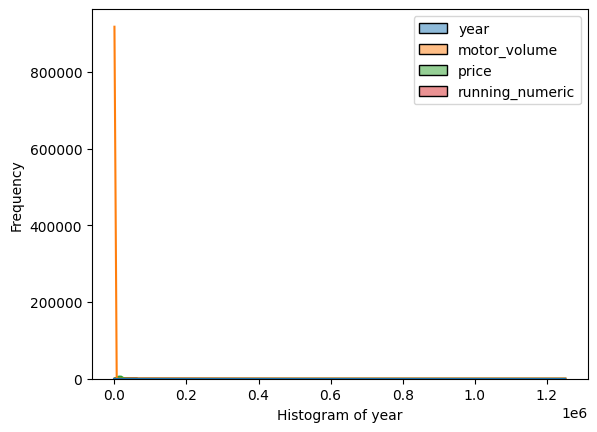

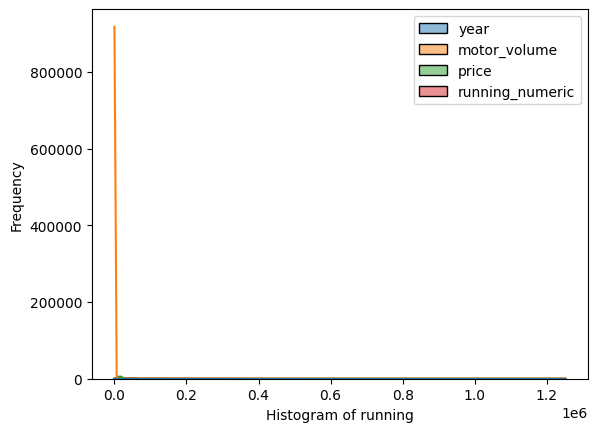

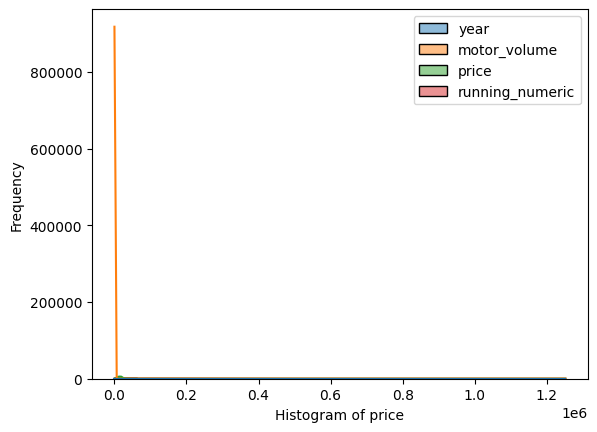

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in num:
    sns.histplot(data=train,bins=20,kde=True)
    plt.xlabel(f'Histogram of {i}')
    plt.ylabel('Frequency')
    plt.show()

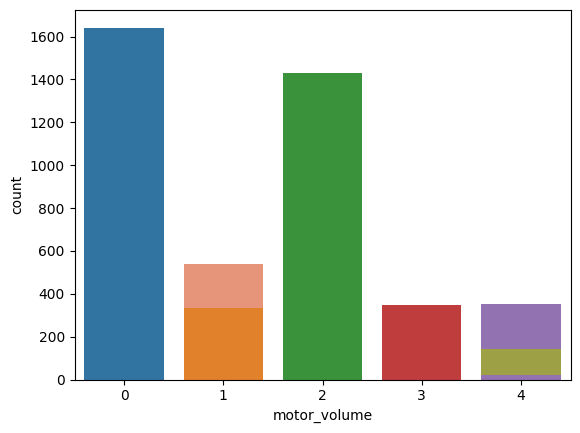

In [16]:
for i in cat:
    sns.countplot(data=train,x=i)

In [17]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in cat:
    train[i]=le.fit_transform(train[[i]])

In [18]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()


In [19]:
from sklearn.model_selection import train_test_split

X = train.drop('price',axis=1)
for i in X:
    X[i]=sc.fit_transform(X[[i]])

y = train['price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2)

In [20]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)
print('Training Accuracy of Linear Regression', lr.score(X_train,y_train))
print('Testing Accuracy of Linear Regression', lr.score(X_test,y_test))

Training Accuracy of Linear Regression 0.49291892858795816
Testing Accuracy of Linear Regression 0.39301165970106


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            411 non-null    int64  
 1   model         411 non-null    object 
 2   year          411 non-null    int64  
 3   motor_type    411 non-null    object 
 4   running       411 non-null    object 
 5   wheel         411 non-null    object 
 6   color         411 non-null    object 
 7   type          411 non-null    object 
 8   status        411 non-null    object 
 9   motor_volume  411 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 32.2+ KB


In [22]:
test.describe()

,Id,year,motor_volume
count,411.00000,411.000000,411.000000
mean,205.00000,2014.963504,2.025061
std,118.78973,6.538899,0.228633
min,0.00000,1993.000000,1.500000
25%,102.50000,2014.000000,2.000000
50%,205.00000,2017.000000,2.000000
75%,307.50000,2019.000000,2.000000
max,410.00000,2023.000000,4.300000


In [23]:
test.isna().sum()

Id              0
model           0
year            0
motor_type      0
running         0
wheel           0
color           0
type            0
status          0
motor_volume    0
dtype: int64

In [24]:
test['running_numeric'] = test['running'].str.extract('(\d+)').astype(float)

In [25]:
def convert_to_km(value):
    numeric_value, unit = value.split()
    numeric_value = float(numeric_value)
    
    if unit.lower() == 'miles':
        return numeric_value * 1.60934  # Convert miles to kilometers
    elif unit.lower() == 'km':
        return numeric_value
    else:
        return None  # Handle cases where the unit is not recognized

# Apply the conversion function to the 'running' column
test['running_numeric'] = test['running'].apply(convert_to_km)

In [26]:
test.drop('running',axis=1,inplace=True)

In [27]:
test['running_numeric'] = test['running_numeric'].astype('int64')
test['motor_volume'] = test['motor_volume'].astype('int64')

In [28]:
tests = test.drop(['Id'], axis = 1)

In [29]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in cat:
    tests[i]=le.fit_transform(tests[[i]])

In [30]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
for i in tests:
    tests[i]=sc.fit_transform(tests[[i]])

In [31]:
# test.drop('Id',axis=1,inplace=True)

In [32]:
test.shape

(411, 10)

In [33]:
# from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

ypred = lr.predict(tests)
# print('r2 score of Linear Regression', r2_score(y_test,ypred))

In [34]:
Prediction = pd.DataFrame({"Id" : test["Id"], "Price":ypred})
Prediction.set_index("Id")

,Price
Id,
0,19457.392362
1,17728.015994
2,18294.332907
3,17212.217923
4,6994.044912
...,...
406,21734.847513
407,15482.852191
408,12739.535958


In [35]:
Prediction.to_csv('submission.csv', index = False)